## 1. Tóm tắt bài toán
-	Xây dựng mô hình phân loại xe của 7 hãng xe : Audi,Hyundai Creta,Mahindra Scorpio,Rolls Royce,Maruti Suzuki Swift,Tata Safari và Toyota Innova.
-	CNN tuân theo một mô hình phân cấp hoạt động trên việc xây dựng một mạng, giống như một cái phễu, và cuối cùng đưa ra một lớp được kết nối đầy đủ (lớp dày đặc) nơi tất cả các nơ-ron được kết nối với nhau và đầu ra được xử lý. giảm số lượng các thông số mà không làm giảm chất lượng của các mô hình. Hình ảnh có kích thước cao (vì mỗi pixel được coi là một đặc điểm) phù hợp với khả năng được mô tả ở trên của CNN.

## 2. Đọc và khám phá dữ liệu bài toán

### Cài thư viện cần thiết

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
train = '/content/drive/MyDrive/CThongke/train'
test= '/content/drive/MyDrive/CThongke/train'

Mounted at /content/drive/


### Đọc dữ liệu và tiền xử lý

In [ ]:
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/CThongke/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/CThongke/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


### Khám phá dữ liệu ảnh

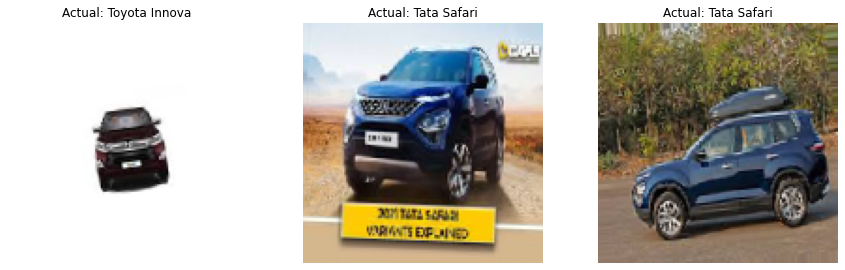

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_generator:
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class}")

        plt.axis("off")
    break

In [ ]:
train_generator.batch_size

32

In [ ]:
train_generator.image_shape

(128, 128, 3)

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

## Xây dựng mô hình

### Thiết kế mô hình và cấu tạo các lớp

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=( 128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=96, activation='relu'))

model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_6 (Dense)             (None, 96)               

### Biên dịch mô hình

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

## Đào tạo mô hình

### Nuôi mô hình

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs= 25
)

Epoch 1/4
105/105 [==============================] - 651s 6s/step - loss: 1.8597 - accuracy: 0.2700 - val_loss: 1.6889 - val_accuracy: 0.3825
Epoch 2/4
105/105 [==============================] - 80s 758ms/step - loss: 1.6504 - accuracy: 0.3962 - val_loss: 1.4933 - val_accuracy: 0.4649
Epoch 3/4
105/105 [==============================] - 80s 760ms/step - loss: 1.4213 - accuracy: 0.4818 - val_loss: 1.2988 - val_accuracy: 0.5510
Epoch 4/4
105/105 [==============================] - 80s 759ms/step - loss: 1.2431 - accuracy: 0.5606 - val_loss: 1.2150 - val_accuracy: 0.5498


Khi mô hình đào tạo, các số liệu về tổn thất và độ chính xác được hiển thị. Mô hình này đạt độ chính xác khoảng 0,56 (hoặc 56%) trên dữ liệu tập huấn.

### Đánh giá độ chính xác

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 8s 317ms/step - loss: 1.2149 - accuracy: 0.5683


In [ ]:
scores

[1.2149454355239868, 0.5682656764984131]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['loss'][:2]

[1.8597491979599, 1.6503970623016357]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 4

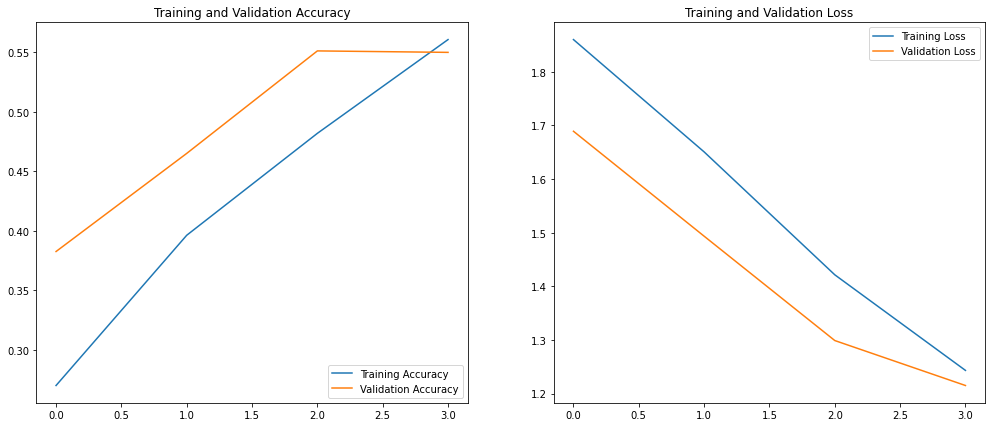

In [ ]:
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Sử dụng mô hình để kiểm đoán

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

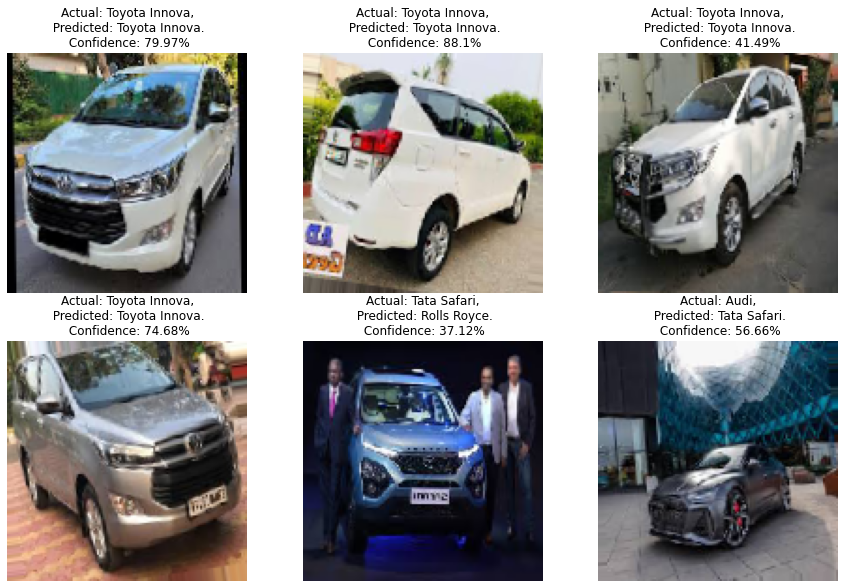

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break